# Momentum Oscillators

We will use Python and Pandas to calculate the MA Deviation.

Real World Example

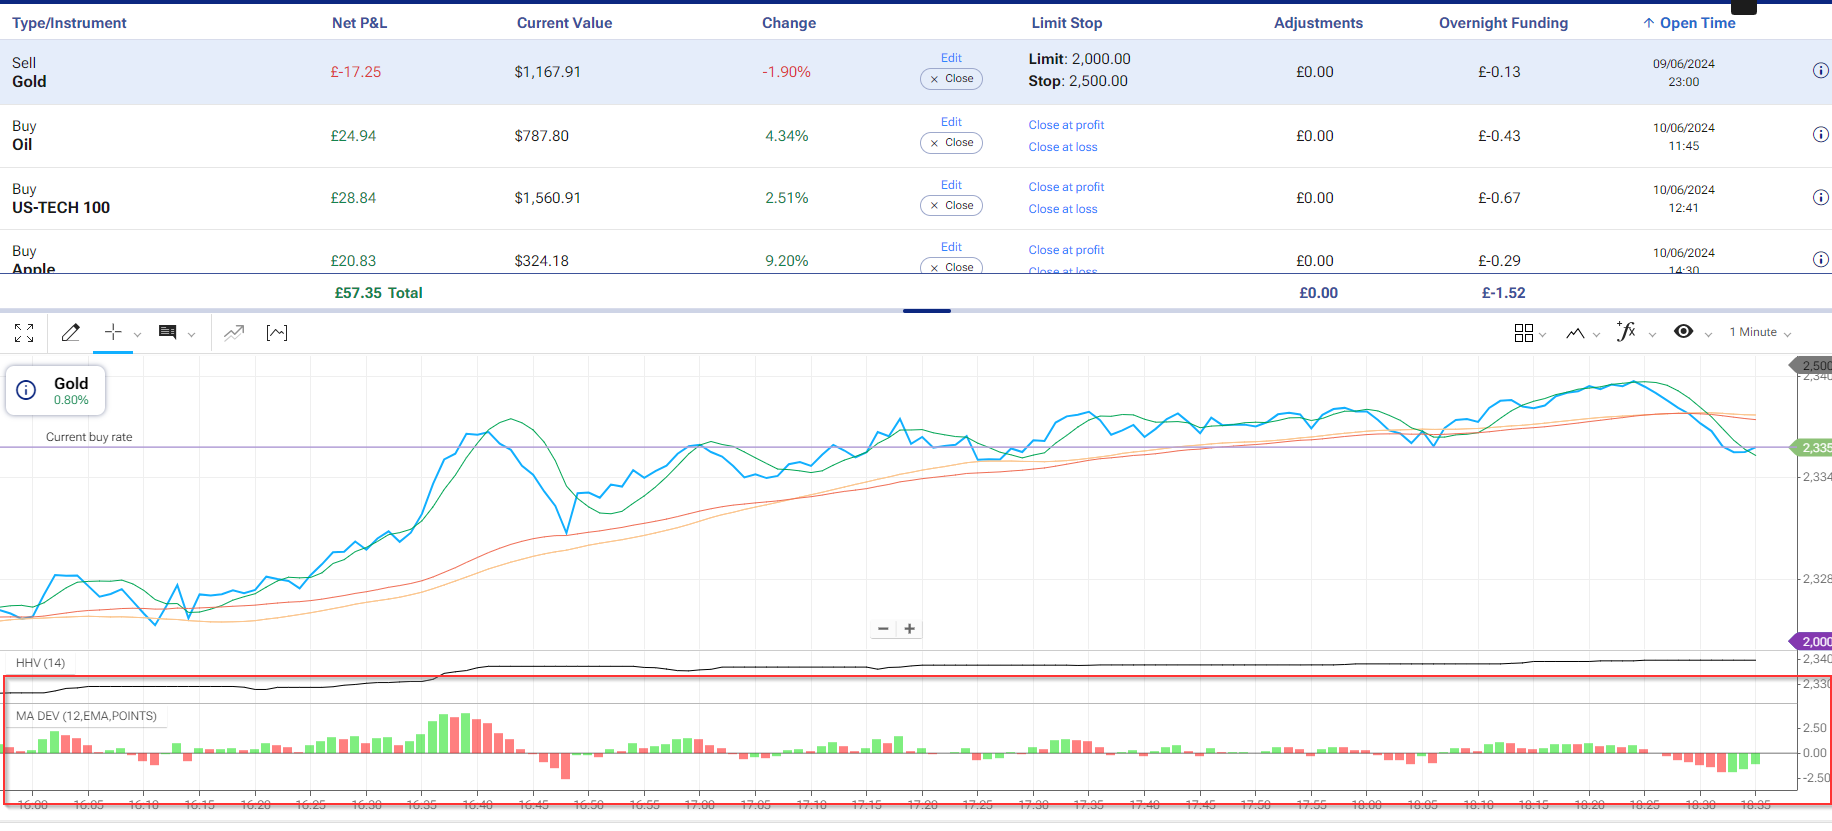

https://www.datacamp.com/tutorial/moving-averages-in-pandas

In [1]:
import numpy as np
import pandas as pd

In [2]:
product = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12],'price':[290,260,288,300,310,303,329,340,316,330,308,310]} # dictionary
df = pd.DataFrame(product) # dictioanry -->> pandas dataframe

In [3]:
#
df['price_change'] = df.price.diff() # percentage difference between the values in current row and previous row
df['price_pct_change'] = df.price.pct_change() # percentage difference between the values in current row and previous row

#
df['SMA'] = df.iloc[:,1].rolling(window=3).mean() # pandas in-built rolling function -->> simple moving average.
df['CMA'] = df.iloc[:,1].expanding(min_periods=4).mean() # pandas built in function -->> expanding (CMA)
df['EMA'] = df.iloc[:,1].ewm(span=40,adjust=False).mean() # -->> Exponential MA

#
df['diff_price_SMA'] = df.price - df.SMA
df['diff_price_CMA'] = df.price - df.CMA
df['diff_price_EMA'] = df.price - df.EMA

df.head()

,month,price,price_change,price_pct_change,SMA,CMA,EMA,diff_price_SMA,diff_price_CMA,diff_price_EMA
0,1,290,NaN,NaN,NaN,NaN,290.000000,NaN,NaN,0.000000
1,2,260,-30.0,-0.103448,NaN,NaN,288.536585,NaN,NaN,-28.536585
2,3,288,28.0,0.107692,279.333333,NaN,288.510410,8.666667,NaN,-0.510410
3,4,300,12.0,0.041667,282.666667,284.5,289.070878,17.333333,15.5,10.929122
4,5,310,10.0,0.033333,299.333333,289.6,290.091811,10.666667,20.4,19.908189


###### Simple Moving Average (SMA)

SMA for a window size of 3, which means you will consider three values each time to calculate the moving average, and for every new value, the oldest value will be ignored.

###### Cumultive Moving Average
We can use the pandas expanding method fo find the cumulative average of the above data. If you recall from the introduction, unlike the simple moving average, the cumulative moving average considers all of the preceding values when calculating the average.

Cumulative Moving Average (CMA): Unlike simple moving average which drops the oldest observation as the new one gets added, cumulative moving average considers all prior observations. CMA is not a very good technique for analyzing trends and smoothing out the data. The reason being, it averages out all of the previous data up until the current data point, so an equally weighted average of the sequence of n values.

######  Exponential Moving Average
EMA Unlike SMA and CMA, exponential moving average gives more weight to the recent prices and as a result of which, it can be a better model or better capture the movement of the trend in a faster way. EMA's reaction is directly proportional to the pattern of the data.

Since EMAs give a higher weight on recent data than on older data, they are more responsive to the latest price changes as compared to SMAs, which makes the results from EMAs more timely and hence EMA is more preferred over other techniques.

### Visualization

In [4]:
import matplotlib.pyplot as plt # matplotlib visualization library
%matplotlib inline

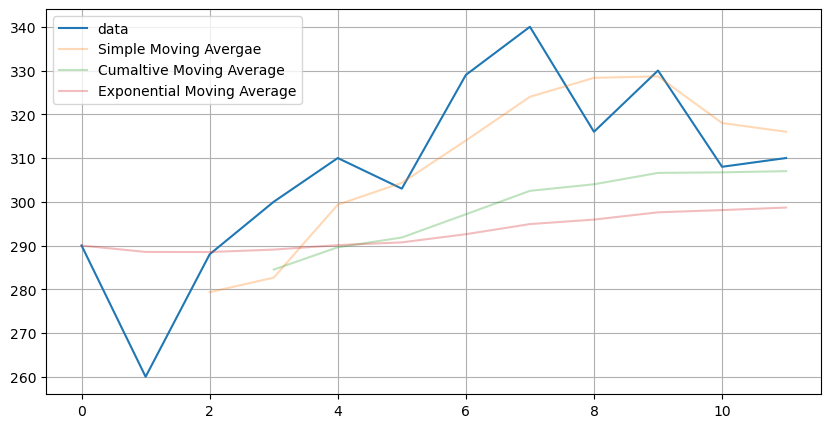

In [5]:
plt.figure(figsize=[10,5])
plt.grid(True)
plt.plot(df['price'],label='data')
plt.plot(df['SMA'],label='Simple Moving Avergae',alpha=0.3)
plt.plot(df['CMA'],label='Cumaltive Moving Average',alpha=0.3)
plt.plot(df['EMA'],label='Exponential Moving Average',alpha=0.3)
plt.legend(loc=2)

### Distance (difference) between -->> Demand - Moving Averages

This analysis should give us insight into which moving average lies closer to the original data point. This will be helpful in forecasting the rate of change between MA's calculated which should give insight into the range where future data points will be located. Hence, being a forecasting indicator.

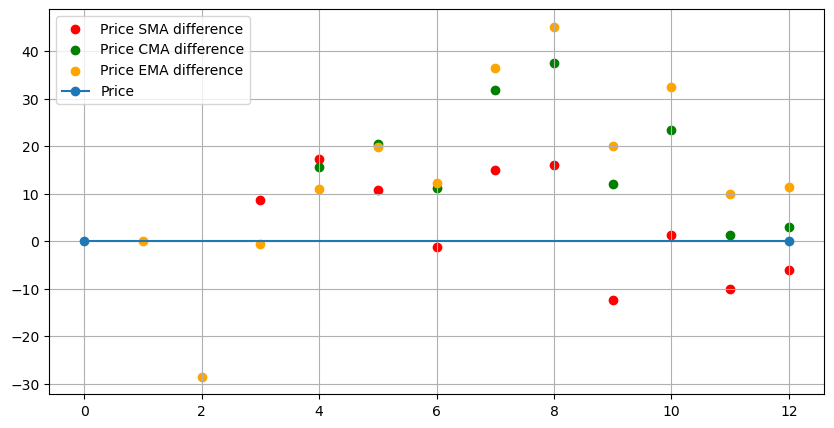

In [6]:
# data points which will sit along the x axis 
x1, y1 = [12,0], [0,0] 

plt.figure(figsize=[10,5])
plt.grid(True)
plt.scatter(df['month'],df['diff_price_SMA'],label='Price SMA difference',color='r')
plt.scatter(df['month'],df['diff_price_CMA'],label='Price CMA difference',color='g')
plt.scatter(df['month'],df['diff_price_EMA'],label='Price EMA difference',color='orange')
plt.plot(x1, y1,label='Price', marker = 'o')
plt.legend(loc=2)

# MOMENTOM OSCILLATOR 

Mvoing Averaage Convergence Divergence

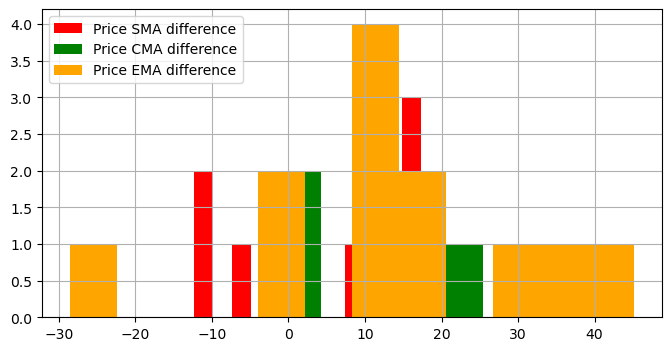

In [7]:
plt.figure(figsize=[8,4])
plt.grid(True)
plt.hist(df['diff_price_SMA'], bins=12, label='Price SMA difference',color='r')
plt.hist(df['diff_price_CMA'], bins=12, label='Price CMA difference',color='g')
plt.hist(df['diff_price_EMA'], bins=12, label='Price EMA difference',color='orange')
plt.legend(loc=2)


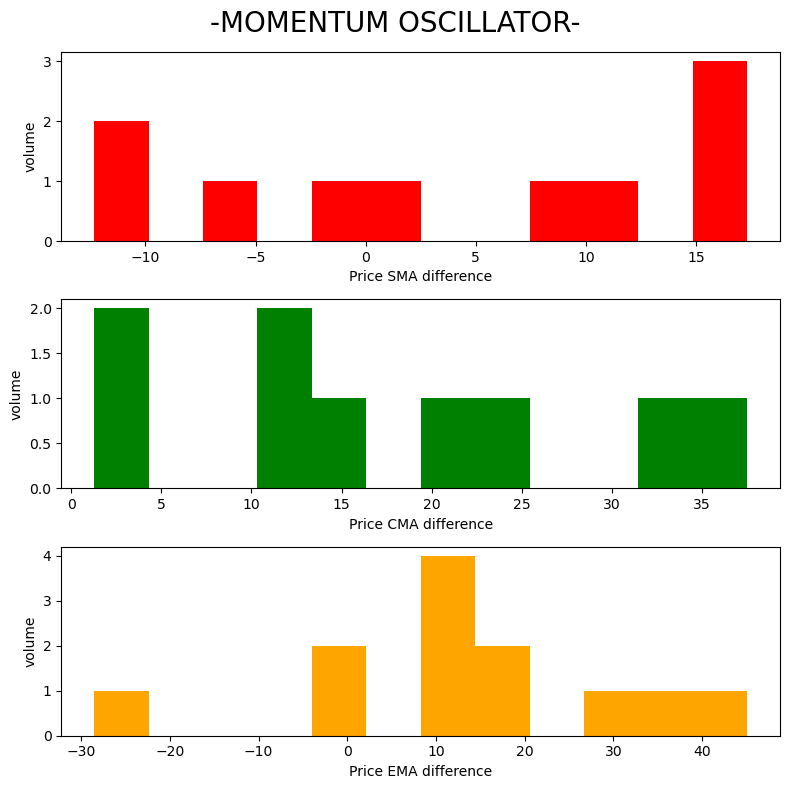

In [13]:
#Generate Bar Plots (Subplots)
fig, ax = plt.subplots(3, figsize = (8,8))
fig.suptitle('-MOMENTUM OSCILLATOR-', fontsize = 20)

ax[0].hist(df['diff_price_SMA'], bins=12,color='r')
ax[1].hist(df['diff_price_CMA'], bins=12,color='g')
ax[2].hist(df['diff_price_EMA'], bins=12,color='orange')

#Set xlabe;s
ax[0].set_xlabel('Price SMA difference')
ax[1].set_xlabel('Price CMA difference')
ax[2].set_xlabel('Price EMA difference')
#set y labels
ax[0].set_ylabel('volume')
ax[1].set_ylabel('volume')
ax[2].set_ylabel('volume')

#Set spacing
fig.tight_layout()
plt.show()

The above scatterplot shows data points for both MAs. We can see clearly that SMA lies closer to 0 essentially meaning this is the rate/range difference between it and the actual value of Rate.

We can calculate the highest and lowest points in each MAs range which would give insight into forecasting where the next data points may lie based on this simple analysis.